In [1]:
import pandas as pd 

df= pd.read_excel("Walmart Sales.xlsx")
df=df.sort_values('Date')
df.head

<bound method NDFrame.head of       Invoice ID Branch       City Customer type  Gender  \
496  556-97-7101      C  Naypyitaw        Normal  Female   
484  493-65-6248      C  Naypyitaw        Member  Female   
567  651-88-7328      A     Yangon        Normal  Female   
523  133-14-7229      A  Naypyitaw        Normal    Male   
970  746-04-1077      B   Mandalay        Member  Female   
..           ...    ...        ...           ...     ...   
393  308-47-4913      A     Yangon        Member  Female   
73   841-35-6630      C  Naypyitaw        Normal  Female   
433  616-87-0016      C   Mandalay        Normal    Male   
585  127-47-6963      C     Yangon        Normal    Male   
84   360-39-5055      B  Naypyitaw        Member    Male   

               Product line  Unit price  Quantity      Date      Time  \
496  Electronic accessories       63.22         2  1/1/2019  15:51:00   
484       Sports and travel       36.98        10  1/1/2019  19:48:00   
567     Fashion accessories   

In [2]:
df.describe()

,Unit price,Quantity,Rating
count,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,6.97270
std,26.494628,2.923431,1.71858
min,10.080000,1.000000,4.00000
25%,32.875000,3.000000,5.50000
50%,55.230000,5.000000,7.00000
75%,77.935000,8.000000,8.50000
max,99.960000,10.000000,10.00000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 496 to 84
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 101.6+ KB


In [4]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Date', 'Time', 'Payment',
       'Rating'],
      dtype='object')

In [5]:
df.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [6]:
df.value_counts('Branch')

Branch
A    343
B    340
C    317
Name: count, dtype: int64

## Q1. performance of sales and revenue at the city and branch level

In [135]:

df1=pd.DataFrame({'Branch': df['Branch'],
                  'City':df['City'],
                  'Quantity':df['Quantity'],
                  'Revenue':df['Unit price']*df['Quantity']})

performance_of_sales_and_revenue=df1.groupby(['City','Branch']).agg({'Quantity':'sum',
                                                                    'Revenue':'sum'})
performance_of_sales_and_revenue


Quantity   Revenue
City      Branch                    
Mandalay  A            637  34130.09
          B            664  37215.93
          C            519  29794.62
Naypyitaw A            648  35985.64
          B            604  35157.75
          C            579  34160.14
Yangon    A            598  33647.27
          B            631  35193.51
          C            630  32302.43

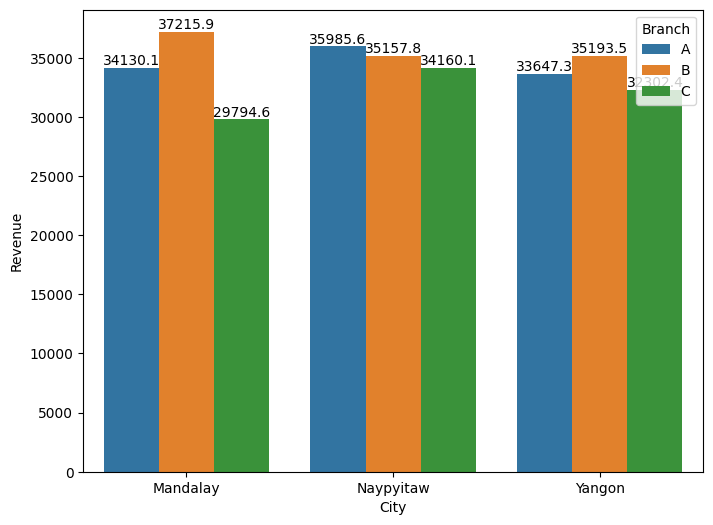

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(8, 6))
ax=sns.barplot(performance_of_sales_and_revenue,x='City',hue='Branch',y='Revenue')
for bars in ax.containers:
    ax.bar_label(bars)

the city mandalay of branch b has produce the highest revenue

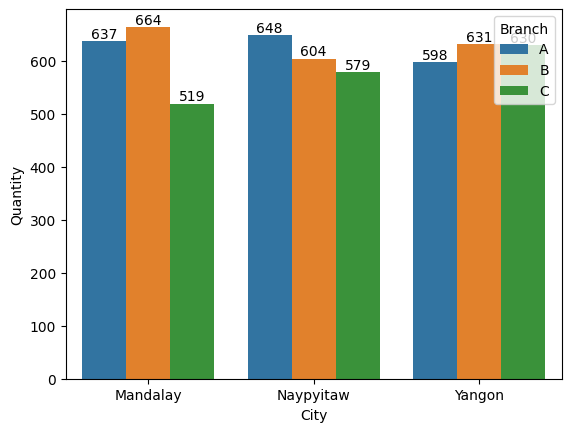

In [144]:
ax=sns.barplot(performance_of_sales_and_revenue,x='City',hue='Branch',y='Quantity')
for bars in ax.containers:
    ax.bar_label(bars)

the city mandalay of branch b has produce the highest performance of sales 

## Q2. average price of an item sold at each branch of the city

In [9]:
df3=pd.DataFrame({'city':df['City'],
                 'branch':df['Branch'],
                 'unit price':df['Unit price']})
df3=df3.groupby(['city','branch']).agg({'unit price':'mean'})
df3=df3.rename(columns={'unit price' :'avg price of item'})

In [10]:
df3.describe()

,avg price of item
count,9.000000
mean,55.736703
std,1.994731
min,52.684602
25%,54.123182
50%,56.011062
75%,57.785688
max,57.958316


In [11]:
df3

avg price of item
city      branch                   
Mandalay  A               53.353866
          B               56.133305
          C               57.958316
Naypyitaw A               54.123182
          B               57.785688
          C               57.941009
Yangon    A               55.639298
          B               56.011062
          C               52.684602

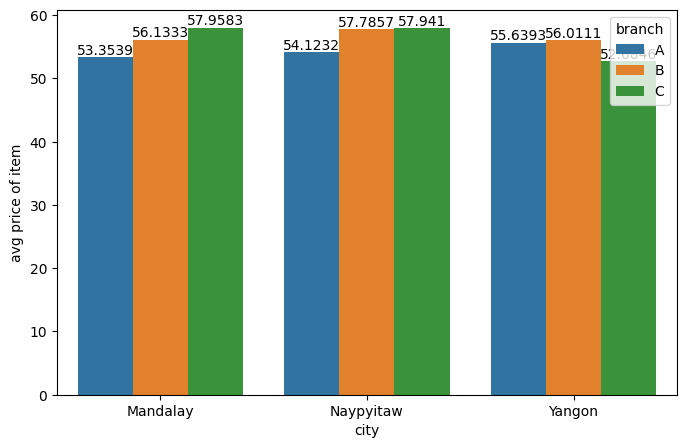

In [143]:
fig,ax=plt.subplots(figsize=(8, 5))
ax=sns.barplot(df3,x='city',hue='branch',y='avg price of item')
for bars in ax.containers:
    ax.bar_label(bars)

city mandalay of branch c has the highest avg price of item  and city yangon of branch c has the lowest avg price of item 

## Q3a. performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method

In [12]:
date= pd.date_range(start='1/1/2019',end='3/9/2019',freq='ME')
date

DatetimeIndex(['2019-01-31', '2019-02-28'], dtype='datetime64[ns]', freq='ME')

In [13]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Date', 'Time', 'Payment',
       'Rating'],
      dtype='object')

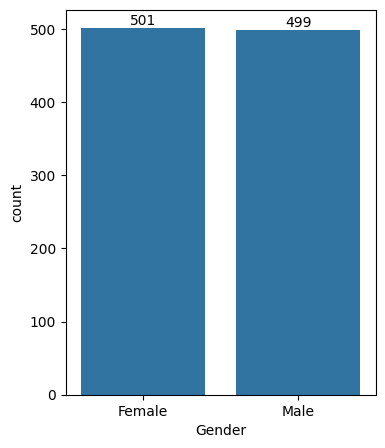

In [140]:
import seaborn as sns

fig,ax=plt.subplots(figsize=(4, 5))
df4=df
ax=sns.countplot(x='Gender',data=df4)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [77]:
df4['amount']=df['Unit price']*df['Quantity']

df4.sort_index()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,amount
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46:00,Ewallet,6.2,40.35
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16:00,Ewallet,4.4,973.80
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22:00,Cash,7.7,31.84
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33:00,Cash,4.1,65.82


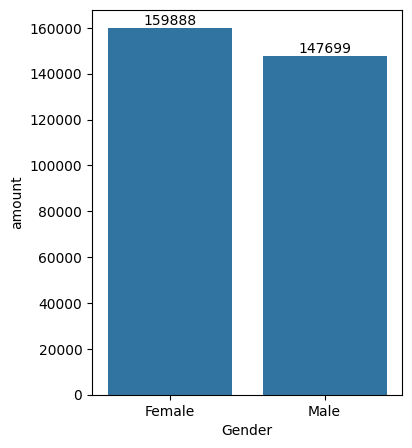

In [128]:
sales_age=df4.groupby(['Gender'],as_index=False)['amount'].sum().sort_values(by='amount',ascending=False)
fig, ax = plt.subplots(figsize=(4, 5))
ax=sns.barplot(data=sales_age,x='Gender',y='amount',ax=ax)
for bars in ax.containers:
    ax.bar_label(bars)

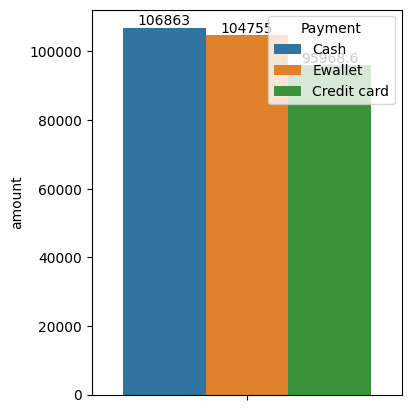

In [153]:
sales_age=df4.groupby(['Payment'],as_index=False)['amount'].sum().sort_values(by='amount',ascending=False)
fig, ax = plt.subplots(figsize=(4, 5))
ax=sns.barplot(data=sales_age,hue='Payment',y='amount',ax=ax )
for bars in ax.containers:
    ax.bar_label(bars)

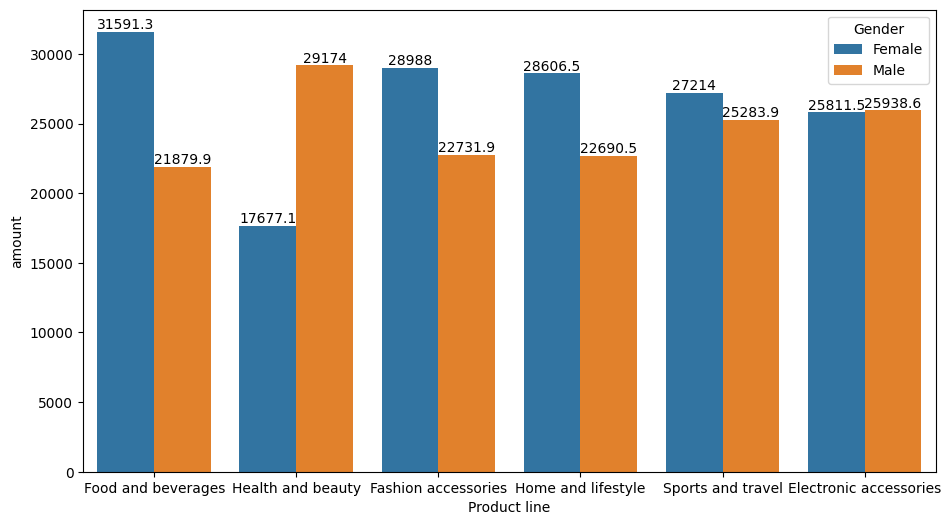

In [155]:
Product_line=df4.groupby(['Product line','Gender'],as_index=False)['amount'].sum().sort_values(by='amount',ascending=False)
fig, ax = plt.subplots(figsize=(11, 6))
ax=sns.barplot(data=Product_line,x='Product line',y='amount',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

## Q3b. identify the focus areas to get better sales for April 2019

i was unable to complete the 3 ques due to time

## Q4. App Exploration two aspects that i think could be significantly improved

1. by integrating jar with e-commerce so that user can select and add their product to wishlist .when ever thier target completes jar will place the order
2. add more detail to the gold locker to educate and inform user about buying gold online . while geting back pop of here's why you should start ... came which should have been on landing page.

## Q5. What can we do to get more people interested in spinning the wheel?

to get more people to interested in spin wheel there many ways i think which can help 
1. if a user gets nothing in the spin wheel display a relevant motivation quote generated based on users whishlist and goal 
2. by adding a feature of automatic stock buy set by the user which will make the user to open jar app and increase the spin wheel 
3. giving uesfull coupons in the winning the spin 


